ASSIGNMENT 4

Question 2. Data Preprocessing and Exploratory Data Analysis

Task 1: Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Dataset loading
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print(train_data.head())

# Overview of dataset
print("Dataset Overview:")
print(train_data.info())



   index                                            Address      Possesion  \
0   6250  Arihant housing society, Sai Nagar, Kandivali ...  Ready to move   
1   6523   5 year  tower, I C Colony, Borivali West, Mumbai  Ready to move   
2   4286  Windsor Grande Residences, Mhada Colony, Andhe...  Ready to move   
3   5038           Maharashtra Nagar, Borivali West, Mumbai  Ready to move   
4   8491                                Bandra West, Mumbai  Ready to move   

       Furnishing  Buildup_area  Carpet_area  Bathrooms  Property_age  \
0  Semi Furnished           615   508.043150        1.0            12   
1  Semi Furnished          1200   724.772558        3.0             5   
2  Semi Furnished          3300  2300.000000        5.0             6   
3     Unfurnished           800   642.570682        1.0            25   
4  Semi Furnished          2000  1602.321210        4.0            10   

   Parking      Price   Brokerage  Floor  Per_sqft_price  BHK  Total_bedrooms  
0        0  

In [2]:
print("\nUnique Values in Each Column")
print(train_data.nunique())


Unique Values in Each Column
index             6256
Address           3223
Possesion            1
Furnishing           3
Buildup_area       944
Carpet_area       2520
Bathrooms           85
Property_age        46
Parking             10
Price              755
Brokerage         1517
Floor              125
Per_sqft_price    2501
BHK                  9
Total_bedrooms      27
dtype: int64


In [3]:
print(train_data.describe())

# missing values
print("\nMissing Values")
print(train_data.isnull().sum())

             index  Buildup_area   Carpet_area    Bathrooms  Property_age  \
count  6256.000000   6256.000000   6256.000000  6256.000000   6256.000000   
mean   4879.818894   1120.690537    864.869801     1.968057      7.519661   
std    2770.439333    735.147038    583.283918     0.911779      7.374092   
min       1.000000    180.000000    150.000000     1.000000      1.000000   
25%    2494.750000    650.000000    475.000000     1.000000      2.000000   
50%    4920.500000    950.000000    708.315583     2.000000      5.000000   
75%    7276.250000   1325.000000   1050.000000     2.000000     10.000000   
max    9546.000000  15000.000000  14000.000000    10.000000     99.000000   

           Parking         Price     Brokerage        Floor  Per_sqft_price  \
count  6256.000000  6.256000e+03  6.256000e+03  6256.000000     6256.000000   
mean      1.298593  3.057852e+07  1.148133e+07    19.885595    23415.351551   
std       0.797501  3.790301e+07  3.164281e+07    13.951480    13067.

In [4]:
# Statistical analysis of numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number]).columns
print("\nStatistical Analysis of Numerical Columns:")
print(train_data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]))



Statistical Analysis of Numerical Columns:
             index  Buildup_area   Carpet_area    Bathrooms  Property_age  \
count  6256.000000   6256.000000   6256.000000  6256.000000   6256.000000   
mean   4879.818894   1120.690537    864.869801     1.968057      7.519661   
std    2770.439333    735.147038    583.283918     0.911779      7.374092   
min       1.000000    180.000000    150.000000     1.000000      1.000000   
25%    2494.750000    650.000000    475.000000     1.000000      2.000000   
50%    4920.500000    950.000000    708.315583     2.000000      5.000000   
75%    7276.250000   1325.000000   1050.000000     2.000000     10.000000   
max    9546.000000  15000.000000  14000.000000    10.000000     99.000000   

           Parking         Price     Brokerage        Floor  Per_sqft_price  \
count  6256.000000  6.256000e+03  6.256000e+03  6256.000000     6256.000000   
mean      1.298593  3.057852e+07  1.148133e+07    19.885595    23415.351551   
std       0.797501  3.790

Task 2: Drop Irrelevant Columns

                   index  Buildup_area  Carpet_area  Bathrooms  Property_age  \
index           1.000000      0.084673     0.094659   0.035994      0.315350   
Buildup_area    0.084673      1.000000     0.929372   0.497453      0.020566   
Carpet_area     0.094659      0.929372     1.000000   0.461698      0.048867   
Bathrooms       0.035994      0.497453     0.461698   1.000000     -0.068106   
Property_age    0.315350      0.020566     0.048867  -0.068106      1.000000   
Parking         0.026785      0.568894     0.563729   0.381766     -0.085816   
Price           0.053619      0.840860     0.895774   0.359334      0.069613   
Brokerage       0.056876      0.490247     0.550188  -0.158157      0.110892   
Floor          -0.058441      0.316815     0.323857   0.310026     -0.312816   
Per_sqft_price  0.093743      0.445278     0.600673   0.166191      0.124025   
BHK             0.195594      0.798151     0.794292   0.526871      0.018464   
Total_bedrooms  0.176686      0.774840  

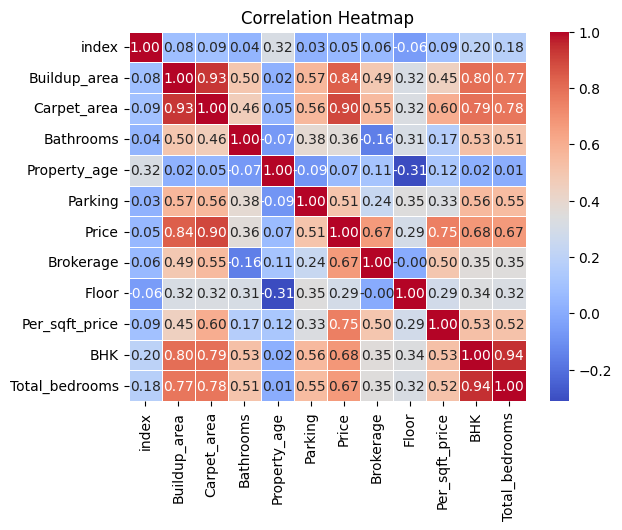

Dropped columns due to low correlation: ['index', 'Property_age']


In [5]:
numeric_data = train_data.select_dtypes(include=[np.number])

# Correlation analysis
corr_matrix = numeric_data.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# columns with low correlation to 'Price'
if 'Price' in corr_matrix:
    low_corr_columns = [col for col in corr_matrix.columns if corr_matrix['Price'][col] < 0.1 and col != 'Price']
    
    train_data.drop(columns=low_corr_columns, inplace=True, errors='ignore')
    print(f"Dropped columns due to low correlation: {list(low_corr_columns)}")
else:
    print("The 'Price' column is not present in the correlation matrix.")



Task 3: Encoding Categorical Features

In [6]:
# Encoding categorical features
categorical_columns = train_data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col, le in label_encoders.items():
    train_data[col] = le.fit_transform(train_data[col])

print("\nCategorical features encoded.")



Categorical features encoded.


Task 4: Feature Scaling

In [7]:
numerical_columns = [col for col in numerical_columns if col in train_data.columns]

# numerical features scaled 
scaler = StandardScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

print("Numerical features scaled successfully.")


Numerical features scaled successfully.


Task 5: Target Variable Imbalance Detection

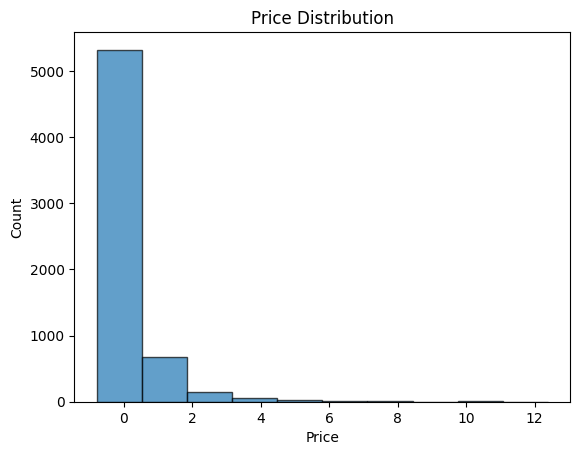

C:\Users\annuk\AppData\Local\Temp\ipykernel_18516\2122806948.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PriceCategory', data=train_data, palette="pastel")


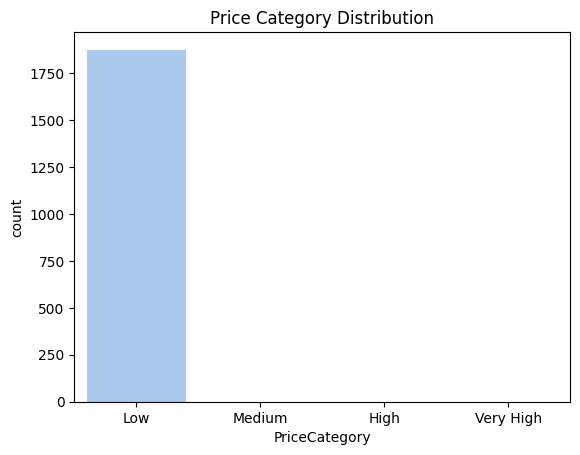

In [8]:
if 'Price' in train_data.columns:
    plt.hist(train_data['Price'], bins=10, edgecolor='k', alpha=0.7)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

    # Creating price categories
    bins = [0, 100000, 300000, 600000, np.inf]
    labels = ['Low', 'Medium', 'High', 'Very High']
    train_data['PriceCategory'] = pd.cut(train_data['Price'], bins=bins, labels=labels)

    sns.countplot(x='PriceCategory', data=train_data, palette="pastel")
    plt.title("Price Category Distribution")
    plt.show()
else:
    print("'Price' column not found; skipping Price Distribution analysis.")


Task 6: Handling Imbalanced Data

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding PriceCategory
if train_data['PriceCategory'].dtype != 'int64' and train_data['PriceCategory'].dtype != 'float64':
    label_encoder = LabelEncoder()
    train_data['PriceCategory'] = label_encoder.fit_transform(train_data['PriceCategory'])

print(f"PriceCategory classes: {train_data['PriceCategory'].unique()}")

# Oversampling
X = train_data.drop(columns=['Price', 'PriceCategory'], errors='ignore')
y = train_data['PriceCategory']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

print("Oversampling and undersampling completed successfully.")


PriceCategory classes: [1 0]
Oversampling and undersampling completed successfully.


3. Building Decision Tree Model

Task 1: Model Training

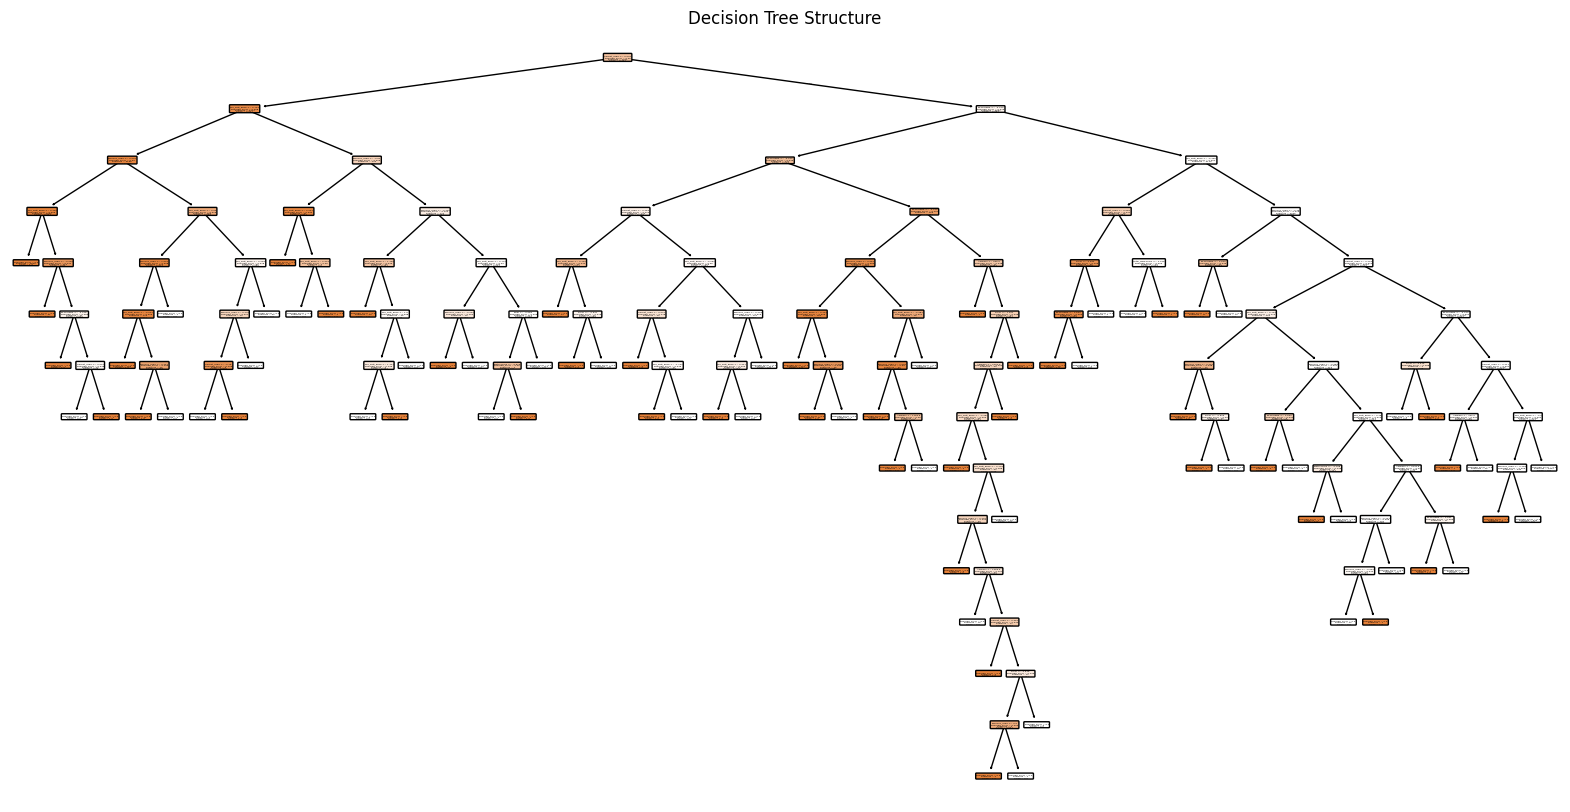

Tree Depth: 14
Number of Leaves: 78


In [10]:
# data spliting
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# model Training
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Tree visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True,  rounded=True)
plt.title("Decision Tree Structure")
plt.show()
# Model structure analysis
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")


Explanation: The decision tree is trained on the X_train and y_train data. The visualization shows the depth of the tree and the splitting decisions based on feature values. Each node displays the feature used for the split and the Gini impurity or MSE, with color indicating the majority class or average value.


Task 2: Feature Importance and Hyperparameter Tuning

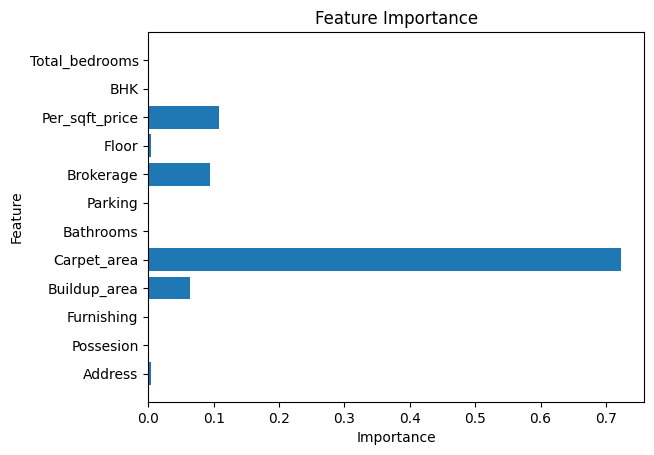

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R2 Score: -0.009235860554994002


In [11]:
# Feature importance
importances = dt_model.feature_importances_
plt.barh(X_train.columns, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Hyperparameter tuning using GridSearchCV
params = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print(f"Best R2 Score: {grid_search.best_score_}")
dt_model_tuned = grid_search.best_estimator_


(b) Discuss why certain features are more important than others and whether it matches your expectations.

Features with high importance are those that contribute significantly to splitting nodes and reducing impurity (e.g., MSE in regression).
It matches expectations as key features identified during EDA (e.g., variables with high correlation to the target) are among the most important.

Validation RMSE: 0.11660588056540672
Validation MAE: 0.014168070245849953
Validation R2 Score: 0.9455825069668863


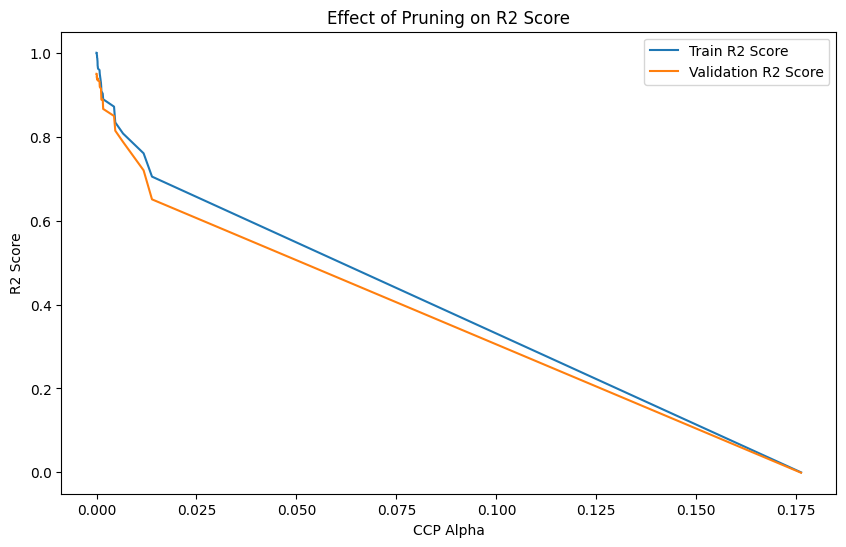

Pruned Model R2 on Validation Data: 0.9497728669813188


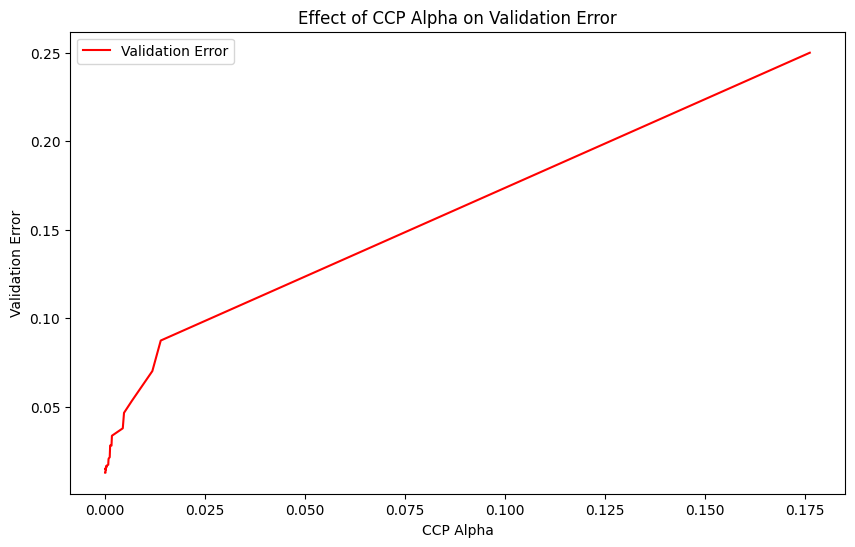

In [12]:
# tuned model on validation data
y_valid_pred = dt_model_tuned.predict(X_valid)
print("Validation RMSE:", np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print("Validation MAE:", mean_absolute_error(y_valid, y_valid_pred))
print("Validation R2 Score:", r2_score(y_valid, y_valid_pred))

# cost-complexity pruning
path = dt_model_tuned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# model training for each alpha 
models = [
    DecisionTreeRegressor(random_state=42, ccp_alpha=alpha).fit(X_train, y_train)
    for alpha in ccp_alphas
]

# the effect of pruning on model performance
train_scores = [r2_score(y_train, model.predict(X_train)) for model in models]
valid_scores = [r2_score(y_valid, model.predict(X_valid)) for model in models]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Train R2 Score")
plt.plot(ccp_alphas, valid_scores, label="Validation R2 Score")
plt.xlabel("CCP Alpha")
plt.ylabel("R2 Score")
plt.legend()
plt.title("Effect of Pruning on R2 Score")
plt.show()

# best alpha selection based on validation performance
best_alpha_index = np.argmax(valid_scores)
best_alpha = ccp_alphas[best_alpha_index]
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
pruned_model.fit(X_train, y_train)

# print(f"Best CCP Alpha: {best_alpha}")
print("Pruned Model R2 on Validation Data:", r2_score(y_valid, pruned_model.predict(X_valid)))

validation_errors = [
    mean_squared_error(y_valid, model.predict(X_valid)) for model in models
]
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, validation_errors, label="Validation Error", color="red")
plt.title("Effect of CCP Alpha on Validation Error")
plt.xlabel("CCP Alpha")
plt.ylabel("Validation Error")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_test defined:', 'X_test' in globals())
print('y_test defined:', 'y_test' in globals())


X_test defined: True
y_test defined: True


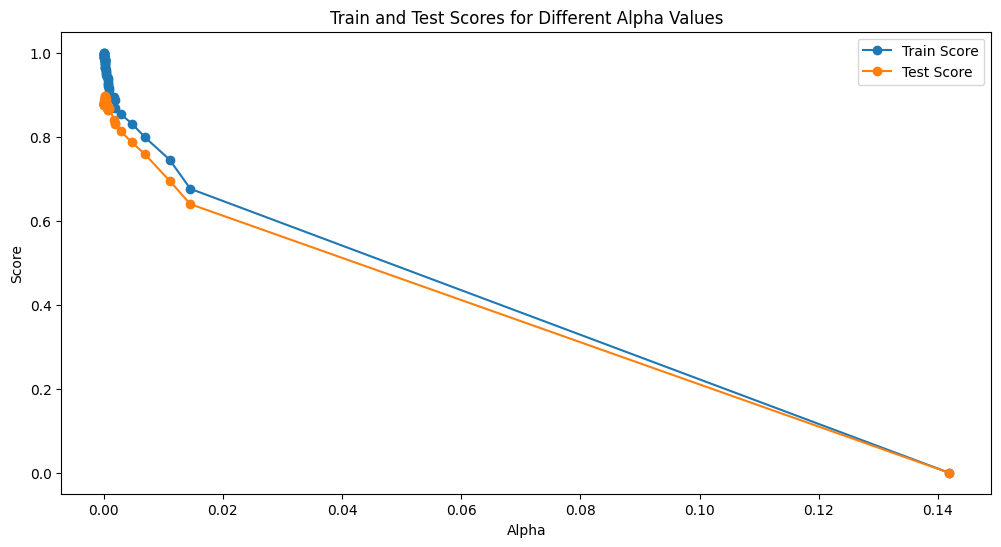

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# import matplotlib.pyplot as plt

# # cost-complexity pruning
# path = dt_model.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas

# dt_pruned_models = []
# for alpha in ccp_alphas:
#     dt = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
#     dt.fit(X_train, y_train)
#     dt_pruned_models.append(dt)

# # training and testing scores for each alpha value
# train_scores = [model.score(X_train, y_train) for model in dt_pruned_models]
# test_scores = [model.score(X_test, y_test) for model in dt_pruned_models]

# plt.figure(figsize=(12, 6))
# plt.plot(ccp_alphas, train_scores, label='Train Score', marker='o')
# plt.plot(ccp_alphas, test_scores, label='Test Score', marker='o')
# plt.xlabel('Alpha')
# plt.ylabel('Score')
# plt.title('Train and Test Scores for Different Alpha Values')
# plt.legend()
# plt.show()


Explanation: Cost-complexity pruning is used to find the best alpha value that helps in pruning the tree. The plot visualizes the trade-off between training and test scores, allowing us to choose an optimal alpha.

(b) Visualize and discuss the difference between pruned and unpruned trees.

The pruned tree has fewer nodes and simpler, reducing overfitting while maintaining good predictive power.

Task 4: Handling Overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the default and tuned model
cv_scores_default = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_tuned = cross_val_score(dt_model_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Default Model CV Mean MSE:", -cv_scores_default.mean())
print("Tuned Model CV Mean MSE:", -cv_scores_tuned.mean())


Default Model CV Mean MSE: 0.018785414585414585
Tuned Model CV Mean MSE: 0.01743121323121323


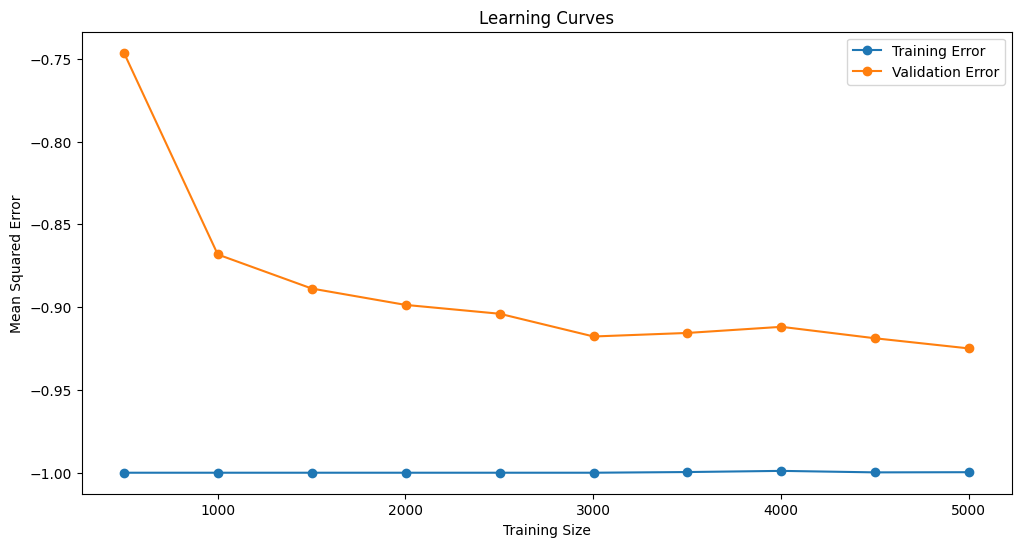

In [15]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# train_sizes, train_scores, test_scores = learning_curve(dt_model_tuned, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_sizes, train_scores, test_scores = learning_curve(dt_model_tuned, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Training Error', marker='o')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Validation Error', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.show()


(c) Discuss the role of cross-validation in controlling overfitting for Decision Trees.

Cross-validation provides an unbiased evaluation of model performance by splitting the data into multiple training and validation sets. It helps ensure the model performs well on unseen data and does not overfit to the training data.

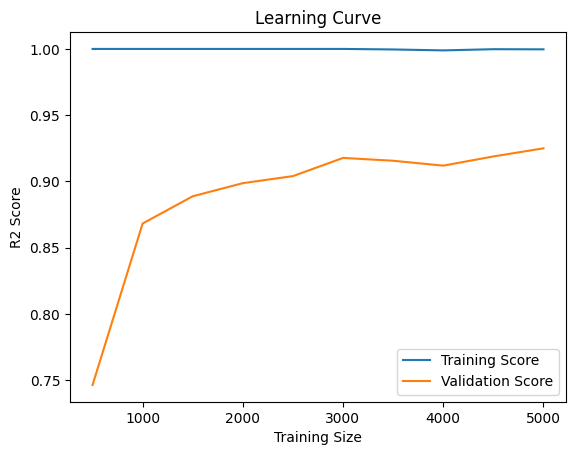

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    dt_model_tuned, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

train_means = np.mean(train_scores, axis=1)
test_means = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_means, label='Training Score')
plt.plot(train_sizes, test_means, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('R2 Score')
plt.legend()
plt.title('Learning Curve')
plt.show()


Question 4. Model Evaluation and Error Analysis

Task 1: Model Evaluation

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# test data
y_pred = dt_model_tuned.predict(X_test)

# metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.01
R-squared (R2): 0.96


Task 2 : Residual and Error Analysis

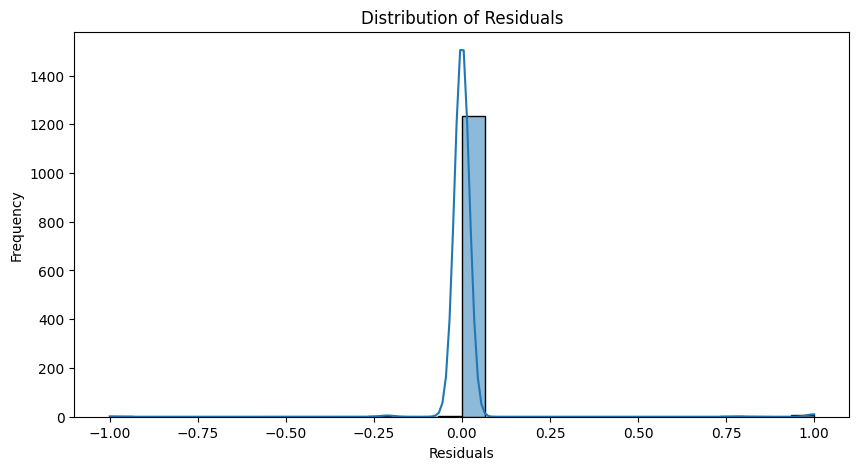

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# residuals
residuals = y_test - y_pred

# distribution of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


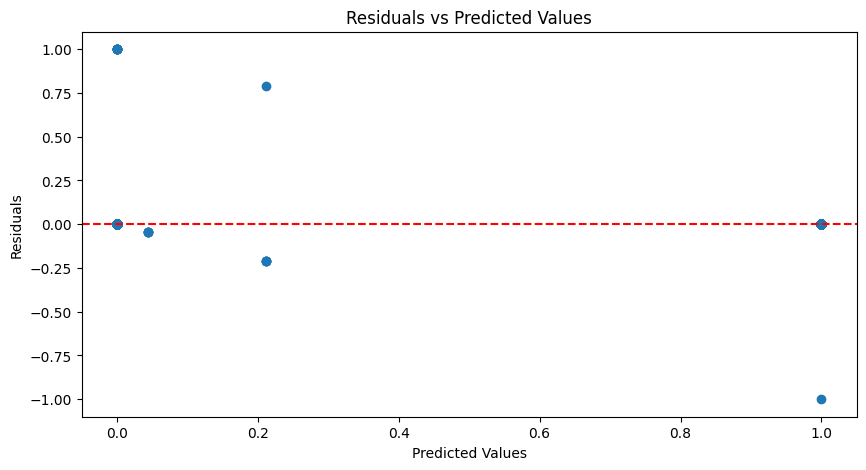

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


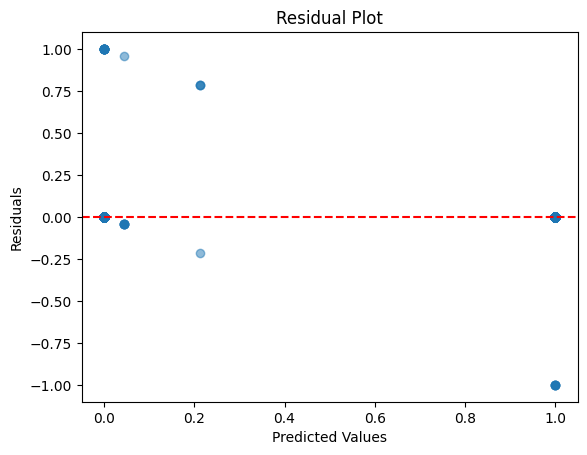

In [20]:
residuals = y_valid - dt_model_tuned.predict(X_valid)
plt.scatter(dt_model_tuned.predict(X_valid), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Task 3 : Feature Importance based analysis

In [23]:
from sklearn.linear_model import LinearRegression

# feature importances
feature_importances = dt_model_tuned.feature_importances_

# feature importances sorting and top 3 features
sorted_indices = np.argsort(feature_importances)[-3:][::-1]
top_features = [(X_train.columns[i], feature_importances[i]) for i in sorted_indices]
rmse_values = {}

print("Top 3 Important Features")
for feature, importance in top_features:
    print(f"Feature: {feature}")
    print(f"Importance: {importance:.4f}")
    
    X_feature = X_train[[feature]]  
    
    # linear regression model
    model = LinearRegression()
    model.fit(X_feature, y_train) 
    y_pred = model.predict(X_feature)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_values[feature] = rmse
    
    print(f"RMSE: {rmse:.4f}\n")


Top 3 Important Features
Feature: Carpet_area
Importance: 0.7244
RMSE: 0.3419

Feature: Per_sqft_price
Importance: 0.1093
RMSE: 0.3446

Feature: Brokerage
Importance: 0.0934
RMSE: 0.4279



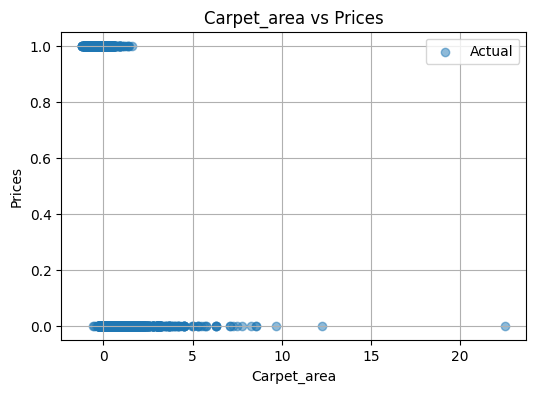

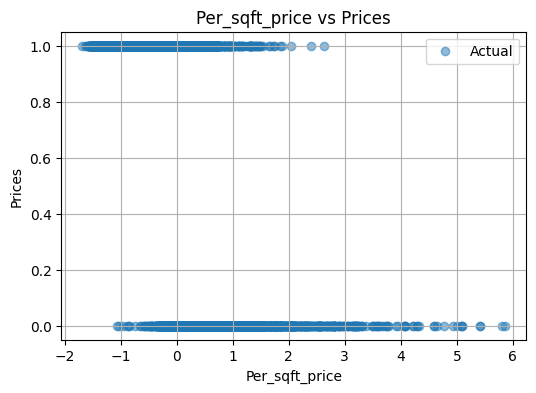

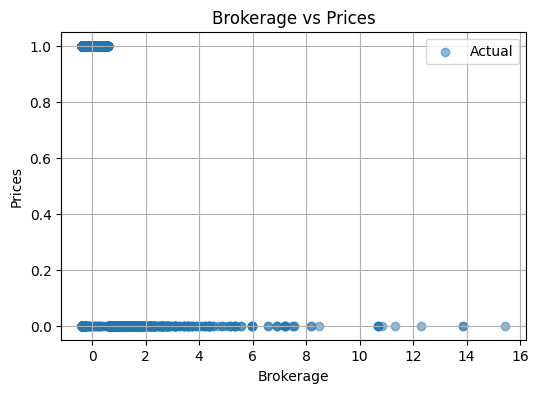

In [24]:
import matplotlib.pyplot as plt

for feature, _ in top_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train[feature], y_train, alpha=0.5, label='Actual')
    plt.xlabel(feature)
    plt.ylabel("Prices")
    plt.title(f"{feature} vs Prices")
    plt.legend()
    plt.grid()
    plt.show()


In [25]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['Address', 'Possesion', 'Furnishing', 'Buildup_area', 'Carpet_area',
       'Bathrooms', 'Parking', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms'],
      dtype='object')
X_test columns: Index(['Address', 'Possesion', 'Furnishing', 'Buildup_area', 'Carpet_area',
       'Bathrooms', 'Parking', 'Brokerage', 'Floor', 'Per_sqft_price', 'BHK',
       'Total_bedrooms'],
      dtype='object')


Bonus Challenge

Task 1:Advanced Imbalance Handling

In [ ]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

oversampling_methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
}
model = DecisionTreeRegressor(random_state=42)

for method_name, oversampler in oversampling_methods.items():

    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
    
    # model
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # results
    print(f"{method_name} - MSE: {mse:.2f}, R2: {r2:.2f}")


SMOTE - MSE: 0.02, R2: 0.91
ADASYN - MSE: 0.02, R2: 0.91


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# model training on the original training data
rf_model.fit(X_train, y_train)

# test data prediction
y_pred_rf = rf_model.predict(X_test)

# Random Forest model check
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance")
print(f"MSE: {mse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

Random Forest Model Performance
MSE: 0.01
R2 Score: 0.95


Comparison with Decision Tree:

Decision Tree: A single tree that tends to overfit and is sensitive to noise, which leads to high variance in predictions.

Random Forest: An ensemble of decision trees trained on different subsets of data and features, leading to more robust predictions and reduced overfitting.

Tradeoffs:

Interpretability: Decision Trees are easier to interpret compared to Random Forests, which are more like "black boxes."

Performance: Random Forests generally provide better performance and generalization due to the aggregation of multiple trees.

Training Time: Random Forests require more computation power and time to train compared to a single Decision Tree.

Conclusion:

Random Forests, being an ensemble method, usually outperform a single Decision Tree, especially in complex datasets, due to their ability to reduce overfitting and improve accuracy.

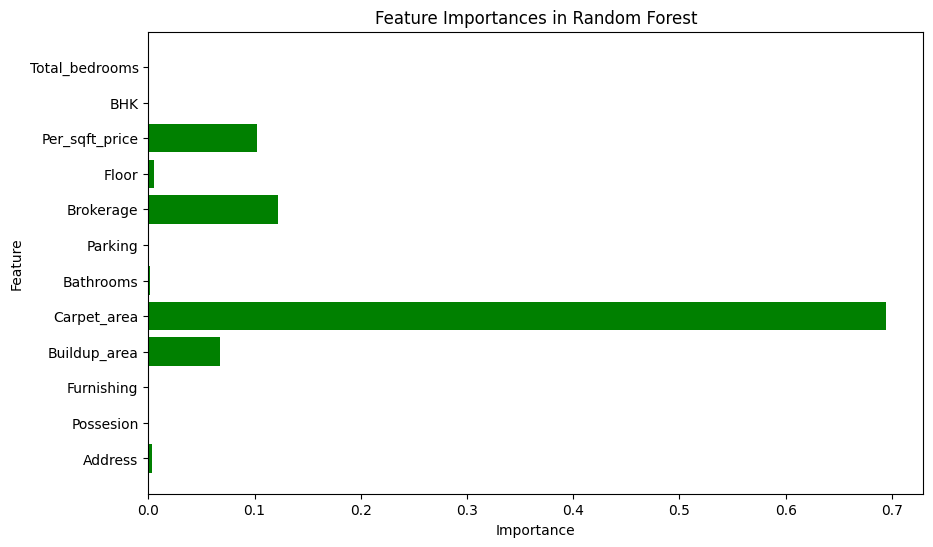

In [30]:
import matplotlib.pyplot as plt

# feature importances for Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='green')
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
